# Google Data Analytics Capstone- Cyclistic Case study
## Case Study : How does a Bike-Share Navigate Speedy Success ?


## Introduction

The bike share analysis case study presented here and brings the real world scenario of the nature of bike riders, i.e.Annual member riders and non-member Casual riders. Data for this analysis has been provided by Motivate International Inc.This is public data that we can use to explor how different customer types are using Cyclistic bikes. for 692 stations across Chicago and is a part of Course work of Google Data Analytics Certificate This case study is given by Google through E-learning cousera.

In order to answer the business questions, follow the steps of the data analysis process: Ask, Prepare, Process, Analyze, Share, and Act.

## Ask
The main goal of this project is to ensure design marketing strategies that would convert casual riders into annual members.Therefore, the focus will be centered on the nature of bike riders for a period of 12 months. The key stake holders are Lily Moreno (Director and Manager), Cyclistic executive members and marketing analytics team.

but first we have to look into  `How do annual members and casual riders use Cyclistic bikes differently?`

Q. What is the problem you are trying to solve?\
Ans:How can Cyclistic use digital media to influence casual riders to become members.

Q. How can your insights drive business decisions?\
Ans: By analyze the data we would be able to draw a data-driven decision for the business.

## Prepare

In [1]:
# import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [2]:
# Reading the csv dataset 
df = pd.read_csv("Cleaned_Trip_data30.csv")

C:\Users\Abhid\AppData\Local\Temp\ipykernel_2840\3132534640.py:2: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Cleaned_Trip_data30.csv")


The dataframe is consist of 3389381 rows and 12 columns.

In [3]:
df.shape

(3389381, 12)

In [4]:
# looking at the dataset 
df.head(2)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_duration,day_of_week,distance_km
0,EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326.0,member,00:07:31,Tuesday,1.737499
1,8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318.0,member,00:03:43,Thursday,0.833411


In [5]:
# checking the datatypes of each columns 
df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
member_casual          object
trip_duration          object
day_of_week            object
distance_km           float64
dtype: object

In [6]:
df.duplicated().sum()

0

In [7]:
df.isna().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
trip_duration         0
day_of_week           0
distance_km           0
dtype: int64

In [8]:
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
start_station_id      0
end_station_name      0
end_station_id        0
member_casual         0
trip_duration         0
day_of_week           0
distance_km           0
dtype: int64

O. Where is your data located?\
Ans:The dataset has been provided through the course material.

Q. How is the data organized?\
Ans: The data was distributed into 12 csv files.I combine them into a single dataframe.

Q. Are there issues with bias or credibility in this data?\
Ans:I didn't find any bais in this Datasets.

Q. How did you verify the data’s integrity?\
Ans:I performed a data cleaning process and creat 3 extra column.

Q. Are there any problems with the data?\
Ans:No, there wasn't any significant problem with the datasate.

## Process
The process stage is to ensure that the data is ready for analysis.

In [9]:
# convert trip_duration (HH:MM:SS) to float (in minutes)
def time_to_float(time_str):
    h, m, s = map(int, time_str.split(':'))
    total_minutes = h * 60 + m + s / 60
    return total_minutes

df['trip_duration'] = df['trip_duration'].apply(time_to_float)

In [10]:
# Renaming the column
df.rename(columns={'trip_duration': 'trip_duration_min'}, inplace=True)

In [11]:
df["started_at"] = pd.to_datetime(df["started_at"])
df["ended_at"] = pd.to_datetime(df["ended_at"])

In [12]:
df["months"] = df['started_at'].dt.strftime('%b')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3389381 entries, 0 to 3389380
Data columns (total 13 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   member_casual       object        
 9   trip_duration_min   float64       
 10  day_of_week         object        
 11  distance_km         float64       
 12  months              object        
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 336.2+ MB


In [14]:
df[df["trip_duration_min"]<= 0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_duration_min,day_of_week,distance_km,months
154172,23EF1DCC9FCA40BA,docked_bike,2020-02-28 11:34:40,2020-02-28 11:34:40,HQ QR,675,HQ QR,675.0,casual,0.0,Friday,0.000000,Feb
162899,86163D9676BBBE62,docked_bike,2020-02-26 14:41:16,2020-02-26 14:41:16,HQ QR,675,HQ QR,675.0,casual,0.0,Wednesday,0.000000,Feb
171398,836931C569802344,docked_bike,2020-02-27 09:56:47,2020-02-27 09:56:47,HQ QR,675,HQ QR,675.0,casual,0.0,Thursday,0.000000,Feb
172403,07CD3CBC94106B37,docked_bike,2020-02-28 10:02:30,2020-02-28 10:02:30,HQ QR,675,HQ QR,675.0,casual,0.0,Friday,0.000000,Feb
183988,83D849E5C5716FA3,docked_bike,2020-02-28 10:39:01,2020-02-28 10:39:01,HQ QR,675,HQ QR,675.0,casual,0.0,Friday,0.000000,Feb
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3238935,B613A314642CB630,docked_bike,2020-11-22 15:33:33,2020-11-22 15:33:33,Burling St & Diversey Pkwy,332.0,Broadway & Waveland Ave,304.0,member,0.0,Sunday,1.773261,Nov
3241258,B2EDCB0D91054411,docked_bike,2020-11-09 19:43:27,2020-11-09 19:43:27,Orleans St & Merchandise Mart Plaza,100.0,Wabash Ave & Grand Ave,199.0,member,0.0,Monday,0.873921,Nov
3258703,5F5EF9146DEB78D5,docked_bike,2020-11-20 17:15:29,2020-11-20 17:15:29,Broadway & Cornelia Ave,303.0,Lake Shore Dr & Belmont Ave,334.0,casual,0.0,Friday,0.799187,Nov
3337693,DCB948C80E436E85,electric_bike,2020-12-13 18:00:22,2020-12-13 18:00:22,Pine Grove Ave & Waveland Ave,TA1307000150,Pine Grove Ave & Waveland Ave,TA1307000150,member,0.0,Sunday,0.000530,Dec


In [15]:
# dropping the trip duration column which is having the 0 value 
df.drop(df.index[df['trip_duration_min'] <= 0],inplace =True)

In [16]:
df[df["trip_duration_min"]<= 0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_duration_min,day_of_week,distance_km,months


In [17]:
# dropping the distance_km column which is having the 0 value 
df.drop(df.index[df['distance_km'] <= 0],inplace =True)

In [18]:
df[df["distance_km"]<= 0]

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_duration_min,day_of_week,distance_km,months


Q. What tools are you choosing and why?\
Ans: Python, because python is suitable for anlayse such a large dataset with 3000000+ rows.

Q. Have you ensured your data’s integrity?\
Ans: Yes, I have performed cleaning and manipulation of data.

Q. What steps have you taken to ensure that your data is clean?\
Ans: No duplicates where found,remove 0 values from "trip_duration_min","distance_km" coulmn and remove NaN values and rows from the data

Q. How can you verify that your data is clean and ready to analyze?\
Ans: Since our data is not having any duplicates, missing values,changing column format and unneccessary data,so we can verify that our data is now cleaned

Q. Have you documented your cleaning process so you can review and share those results?\
Ans: Yes I have, along with the code

Now our data is ready for anlysis

## Analyze
Now that your data is stored appropriately and has been prepared for analysis, start putting it
to work.

In [19]:
df["member_casual"].value_counts()

member_casual
member    2002167
casual    1102563
Name: count, dtype: int64

Here 2002167 member which is 64.5% of total user and 1102563 casual user which is 35.5% of total user.

In [20]:
# Average Trip duration
df["trip_duration_min"].mean()

25.866182770589838

In [21]:
# maximum Trip duration
df["trip_duration_min"].max()

1439.9833333333333

In [22]:
# Mode of week days
df["day_of_week"].mode()

0    Saturday
Name: day_of_week, dtype: object

The average and maximum trip durations are 26 min and 1440 min respectively.\
The most frequently occurring day is `Saturday`. 

In [23]:
# Calculate the average ride_length for members and casual riders.
pivot_table_ridelength=df.pivot_table(index="member_casual",
               values="trip_duration_min",
               aggfunc={"trip_duration_min":"mean"})
pivot_table_ridelength

,trip_duration_min
member_casual,
casual,37.287090
member,19.576862


Average casual riders used the bike for longer time then members. 

In [24]:
# Calculate the average ride_length for users by day_of_week.
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_table_days = df.pivot_table(
    values='trip_duration_min',       
    index='member_casual',             
    columns='day_of_week',       
    aggfunc={"trip_duration_min":"mean"}
)
pivot_table_days.reindex(columns=days_of_week_order)

day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
member_casual,,,,,,,
casual,37.555232,34.834906,32.907361,32.700826,35.660844,40.310824,41.455681
member,17.617035,18.199898,18.895124,17.905495,20.210024,22.422635,22.174446


The saturday and sunday are the busiest days from the week.

In [25]:
# calculate the number of rides for users over the week
days_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

pivot_table_ride = df.pivot_table(
    values='ride_id',      
    index='member_casual',             
    columns='day_of_week',       
    aggfunc="count"
)
pivot_table_ride.reindex(columns=days_of_week_order)



day_of_week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
member_casual,,,,,,,
casual,111497,109731,122026,130942,163712,259038,205617
member,269566,291594,304798,303229,300427,285456,247097


Saturday and sunday are the busiest days for casual riders.\
But over all weekdays are the busiest days among members.

In [26]:
# Top 10 stations start from.
most_viseted_start = df["start_station_name"].value_counts().head(10)
most_viseted_start

start_station_name
Clark St & Elm St             29401
Streeter Dr & Grand Ave       28706
Theater on the Lake           25761
Wells St & Concord Ln         23623
Lake Shore Dr & North Blvd    23138
Broadway & Barry Ave          22872
Lake Shore Dr & Monroe St     22848
Dearborn St & Erie St         22345
Kingsbury St & Kinzie St      21841
Clark St & Armitage Ave       21506
Name: count, dtype: int64

In [27]:
# Top 10 staions to end at.
end_station = df.groupby("end_station_name").size()
most_visited_end = end_station.sort_values(ascending=False)
most_visited_end.head(10)

end_station_name
Streeter Dr & Grand Ave       31275
Clark St & Elm St             29580
Theater on the Lake           27285
Wells St & Concord Ln         24021
Broadway & Barry Ave          23760
Lake Shore Dr & North Blvd    23708
Dearborn St & Erie St         22894
St. Clair St & Erie St        22843
Millennium Park               22503
Lake Shore Dr & Monroe St     22155
dtype: int64

In [28]:
# Riders cycle preference member type.
bike_type = df.pivot_table(values='ride_id', 
                index='member_casual', 
                columns='rideable_type', 
                aggfunc='count', 
                fill_value=0)
bike_type

rideable_type,classic_bike,docked_bike,electric_bike
member_casual,,,
casual,9948,947374,145241
member,56363,1734492,211312


Both member and casual riders are prefers Docked bike over othre two bike type.

Q. How should you organize your data to perform analysis on it?\
Ans: Here I am focusing on four variables: member type, week, trip duration, and distance covered. I organized my data according to this framework.

Q. What surprises did you discover in the data?\
Ans: Most casual users are weekend users while members are mostly weekday users.

Q. What trends or relationships did you find in the data?\
Ans: Between total rider members hold 64.5% but the average trip duration is high in casual rider.\
     Members are mostly weekday rider and casual riders are mostly weekend rider.

Q. How will these insights help answer your business questions?\
Ans: Now we see the difference between Annual members and Casual riders,we can draw insights and give recommendation and policy for data-driven decision

# Share

In this stage i have performed analysis and gained some insights into your data by create visualizations and share my findings.

In [29]:
df_member_only = df[df["member_casual"] == "member"]
df_casual_only = df[df["member_casual"] == "casual"]

In [30]:
# Top 5 Station most frequently traveled between by members.
member_end = df_member_only["end_station_name"].value_counts().head(5)
member_start = df_member_only["start_station_name"].value_counts().head(5)
print(member_start)
print(member_end)

start_station_name
Clark St & Elm St           19292
Kingsbury St & Kinzie St    16335
Broadway & Barry Ave        15389
St. Clair St & Erie St      15287
Dearborn St & Erie St       15143
Name: count, dtype: int64
end_station_name
Clark St & Elm St           19975
St. Clair St & Erie St      17096
Kingsbury St & Kinzie St    16536
Broadway & Barry Ave        15806
Dearborn St & Erie St       15717
Name: count, dtype: int64


The number one starting station for members was also the number one ending station

In [31]:
#  Top 5 Station most frequently traveled between by casual riders.
casual_start = df_casual_only["start_station_name"].value_counts().head(5)
casual_end = df_casual_only["end_station_name"].value_counts().head(5)
print(casual_start)
print(casual_end)

start_station_name
Streeter Dr & Grand Ave      20356
Millennium Park              15482
Lake Shore Dr & Monroe St    14532
Theater on the Lake          11936
Michigan Ave & Oak St        11316
Name: count, dtype: int64
end_station_name
Streeter Dr & Grand Ave      22957
Millennium Park              16532
Lake Shore Dr & Monroe St    13890
Theater on the Lake          13800
Michigan Ave & Oak St        11791
Name: count, dtype: int64


The top 3 starting station for casual riders was also top 3 ending station

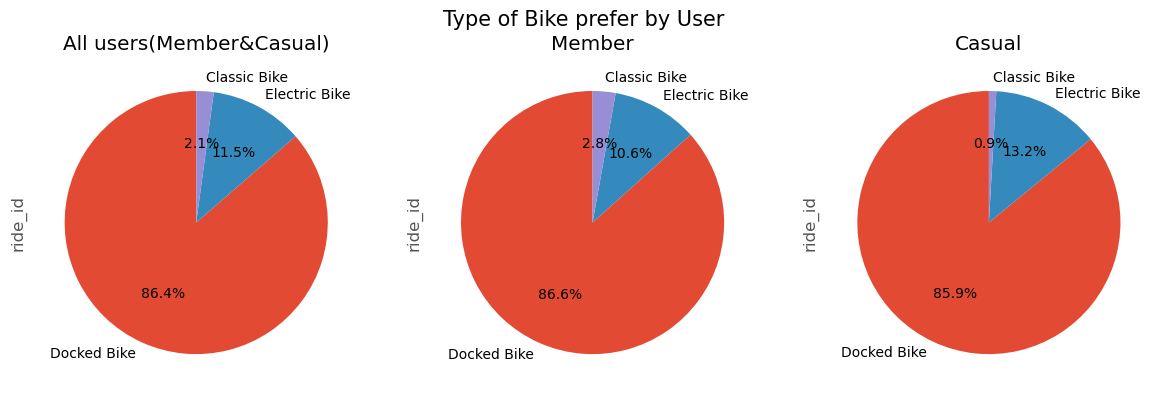

In [32]:
fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 4))
df.groupby("rideable_type")["ride_id"].size().sort_values(ascending=False).plot(kind="pie",ax=ax[0],labels=['Docked Bike', 'Electric Bike','Classic Bike'],autopct='%1.1f%%', startangle=90)
df_member_only.groupby("rideable_type")["ride_id"].size().sort_values(ascending=False).plot(kind="pie",ax=ax[1],labels=['Docked Bike', 'Electric Bike','Classic Bike'],autopct='%1.1f%%', startangle=90)
df_casual_only.groupby("rideable_type")["ride_id"].size().sort_values(ascending=False).plot(kind="pie",ax=ax[2],labels=['Docked Bike', 'Electric Bike','Classic Bike'],autopct='%1.1f%%', startangle=90)
ax[0].set_title("All users(Member&Casual)")
ax[1].set_title("Member")
ax[2].set_title("Casual")
fig.suptitle("Type of Bike prefer by User", fontsize = 15)
fig.tight_layout()
plt.show()

Above, you can see the data visualization and code used to find the bike type used by customer type.Almost 87% user be it member or casual are prefer Docked Bike, 10.6% in member 13.2% in casual rider prefer Electric Bike, only 2.8% in memeber and 0.9% in casual rider prefer Classic Bike

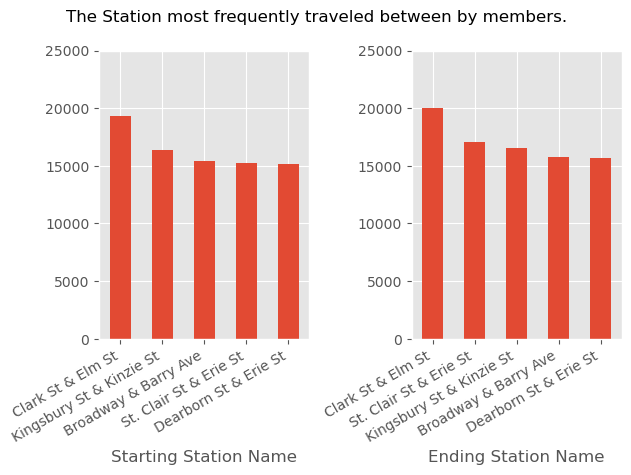

In [33]:
# The Station most frequently traveled between by members.
fig, ax = plt.subplots(1, 2)
df_member_only.groupby('start_station_name').size().sort_values(ascending=False).head(5).plot(kind="bar",ax=ax[0],xlabel="Starting Station Name")
df_member_only.groupby('end_station_name').size().sort_values(ascending=False).head(5).plot(kind="bar",ax=ax[1], xlabel="Ending Station Name")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha="right")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
ax[0].set_ylim(0, 25000)
ax[1].set_ylim(0, 25000)
fig.suptitle("The Station most frequently traveled between by members.", fontsize=12)
fig.tight_layout()
plt.show()

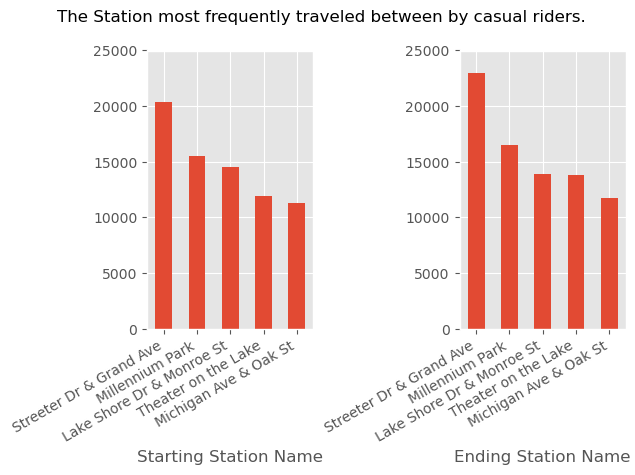

In [34]:
# The Station most frequently traveled between by casual riders.
fig, ax = plt.subplots(1, 2)
df_casual_only.groupby('start_station_name').size().sort_values(ascending=False).head(5).plot(kind="bar",ax=ax[0],xlabel="Starting Station Name")
df_casual_only.groupby('end_station_name').size().sort_values(ascending=False).head(5).plot(kind="bar",ax=ax[1], xlabel="Ending Station Name")
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=30, ha="right")
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=30, ha="right")
ax[0].set_ylim(0, 25000)
ax[1].set_ylim(0, 25000)
fig.suptitle("The Station most frequently traveled between by casual riders.", fontsize=12)
fig.tight_layout()
plt.show()

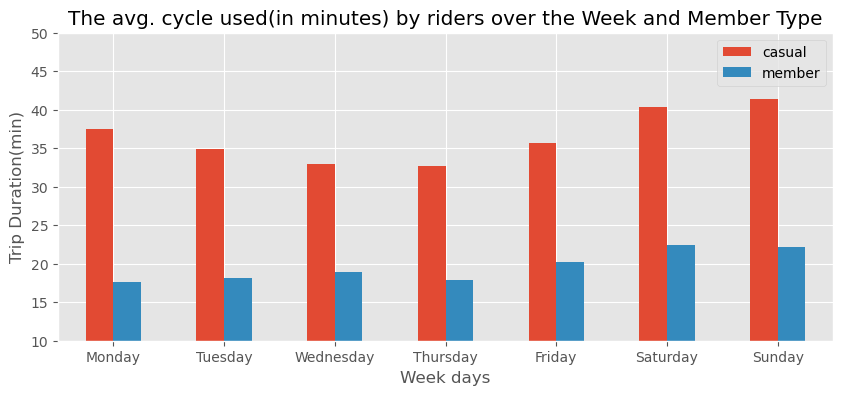

In [35]:
# Grouping Avg.trip duration over the Week and Member Type
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby(["day_of_week","member_casual"])["trip_duration_min"].mean().unstack().reindex(day_order).plot(kind="bar",figsize=(10,4))
plt.ylabel('Trip Duration(min)')
plt.xlabel('Week days')
plt.title('The avg. cycle used(in minutes) by riders over the Week and Member Type')
plt.legend()
plt.ylim(10, 50)
plt.xticks(rotation=0)
plt.show()

Longer duration rides are done on Saturdays.It is interesting to see here that the average trip duration of casual riders are completely off the charts if we compare it to members only. Casuals surpass members everyday. So it is clear that casuals do enjoy the product.Now let's compare it on a monthly

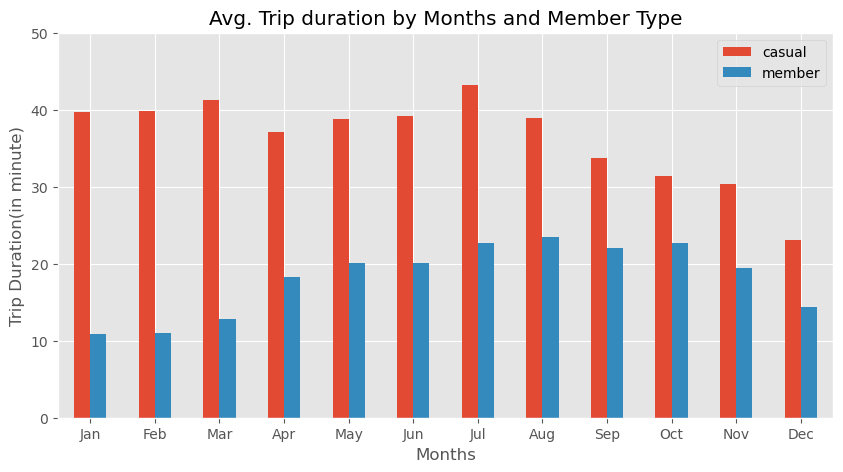

In [36]:
# Grouping Avg.trip duration in the last one year and Member Type
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
df.groupby(["months","member_casual"])["trip_duration_min"].mean().unstack().reindex(month_order).plot(kind="bar", figsize=(10, 5))
plt.ylabel('Trip Duration(in minute)')
plt.xlabel('Months')
plt.title('Avg. Trip duration by Months and Member Type')
plt.ylim(0, 50)
plt.legend()
plt.xticks(rotation=0)
plt.show()

The same could be said here. Casuals are indeed the main consumers throughout the year even though we have more member riders

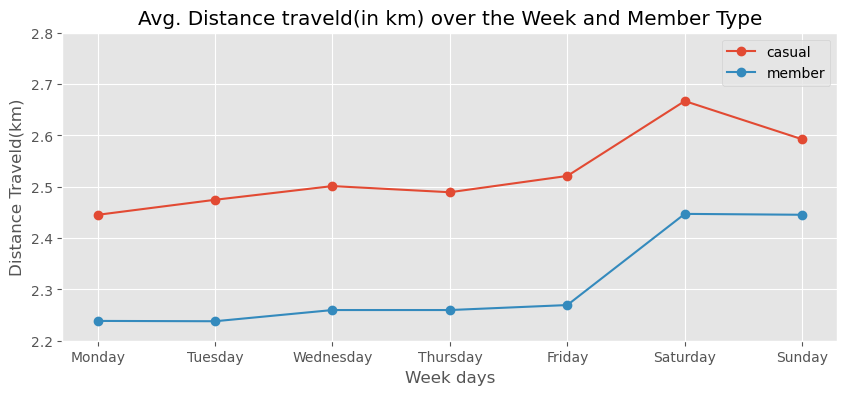

In [37]:
# Grouping Avg. Distance traveld over the Week and Member Type
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby(["day_of_week","member_casual"])["distance_km"].mean().unstack().reindex(day_order).plot(kind="line",marker="o",figsize=(10,4))
plt.ylabel('Distance Traveld(km)')
plt.xlabel('Week days')
plt.title('Avg. Distance traveld(in km) over the Week and Member Type')
plt.legend()
plt.ylim(2.2 , 2.8)
plt.xticks(rotation=0)
plt.show()

The longest rides  are usually done on Saturday. We can see that in there are more casual riders than member riders

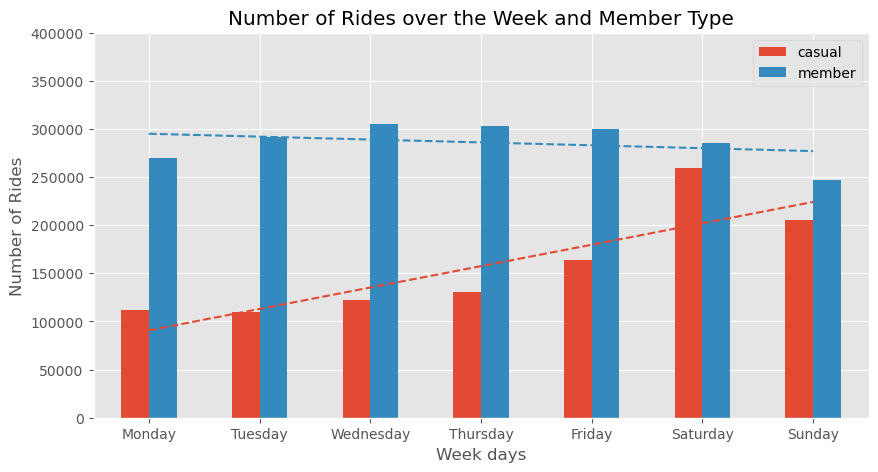

In [38]:
# Grouping total number of rides over the Week and Member Type
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_grouped = df.groupby(["day_of_week","member_casual"])["ride_id"].size().unstack().reindex(day_order)
ax = df_grouped.plot(kind="bar",figsize=(10, 5))
plt.ylabel('Number of Rides')
plt.xlabel('Week days')
plt.title('Number of Rides over the Week and Member Type')
plt.legend()
plt.ylim(0, 400000)

# Add trendlines
x = np.arange(len(day_order))

for category in df_grouped.columns:
    y = df_grouped[category].values
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), linestyle="--", label=f'{category} trendline')

plt.xticks(rotation=0)
plt.show()

Here, we can observe the total number of rides classified per week. Casuals are more active during the weekend which is quite reasonable while members tend to peak Wednesday and Thursday,Friday.

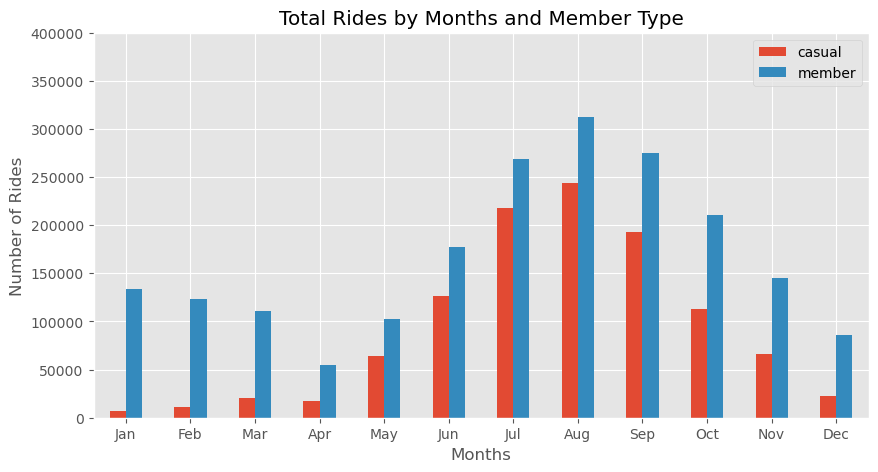

In [39]:
# Grouping total number of rides in last one year and Member Type
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep','Oct', 'Nov', 'Dec']
df.groupby(["months","member_casual"])["ride_id"].size().unstack().reindex(month_order).plot(kind="bar", figsize=(10, 5))
plt.ylabel('Number of Rides')
plt.xlabel('Months')
plt.title('Total Rides by Months and Member Type')
plt.ylim(0, 400000)
plt.legend()
plt.xticks(rotation=0)
plt.show()

 we see most users are using the bikes between july to august,which are hottest months among all.

Q. Were you able to answer the question of how annual members and casual riders use Cyclistic bikes differently?\
Ans: Yes,Causal riders ride more on the weekends and annual members rides more on weekdays

Q. What story does your data tell?\
Ans: 
1. Streeter Dr & Grand Ave,Millennium Park and Lake Shore Dr & Monroe St are the stations where casual riders traveled frequently.

2. The average trip duration and distance traveld of casual riders are completely higher then members only.

3. overall we see most users are using the bikes during the spring and summer . Also, most casual users are weekend users while members are mostly weekday users.

Q. How do your findings relate to your original question?\
Ans:The above findings delivers the original question's answer properly.

Q. Can data visualization help you share your findings?\
Ans: yes, it does.
For more insight : https://public.tableau.com/app/profile/abhipsita.dasgupta/viz/visulization_17223573410950/Dashboard1